In [1]:
# Movie Genre Classification - Data Preprocessing
# CodSoft ML Internship - Task 1

import pandas as pd
import numpy as np
import re
import pickle
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the data
print("Loading dataset...")
train_data = pd.read_csv('../data/train_data.txt', sep=':::', 
                         names=['ID', 'Title', 'Genre', 'Description'], 
                         engine='python', encoding='latin-1')

test_data = pd.read_csv('../data/test_data.txt', sep=':::', 
                        names=['ID', 'Title', 'Description'], 
                        engine='python', encoding='latin-1')

print(f"Training data shape: {train_data.shape}")
print(f"Test data shape: {test_data.shape}")
print("\nFirst few rows:")
print(train_data.head())

Loading dataset...
Training data shape: (54214, 4)
Test data shape: (54200, 3)

First few rows:
   ID                               Title       Genre  \
0   1       Oscar et la dame rose (2009)       drama    
1   2                       Cupid (1997)    thriller    
2   3   Young, Wild and Wonderful (1980)       adult    
3   4              The Secret Sin (1915)       drama    
4   5             The Unrecovered (2007)       drama    

                                         Description  
0   Listening in to a conversation between his do...  
1   A brother and sister with a past incestuous r...  
2   As the bus empties the students for their fie...  
3   To help their unemployed father make ends mee...  
4   The film's title refers not only to the un-re...  



Missing values:
ID             0
Title          0
Genre          0
Description    0
dtype: int64

Genre distribution:
Genre
drama           13613
documentary     13096
comedy           7447
short            5073
horror           2204
thriller         1591
action           1315
western          1032
reality-tv        884
family            784
adventure         775
music             731
romance           672
sci-fi            647
adult             590
crime             505
animation         498
sport             432
talk-show         391
fantasy           323
mystery           319
musical           277
biography         265
history           243
game-show         194
news              181
war               132
Name: count, dtype: int64


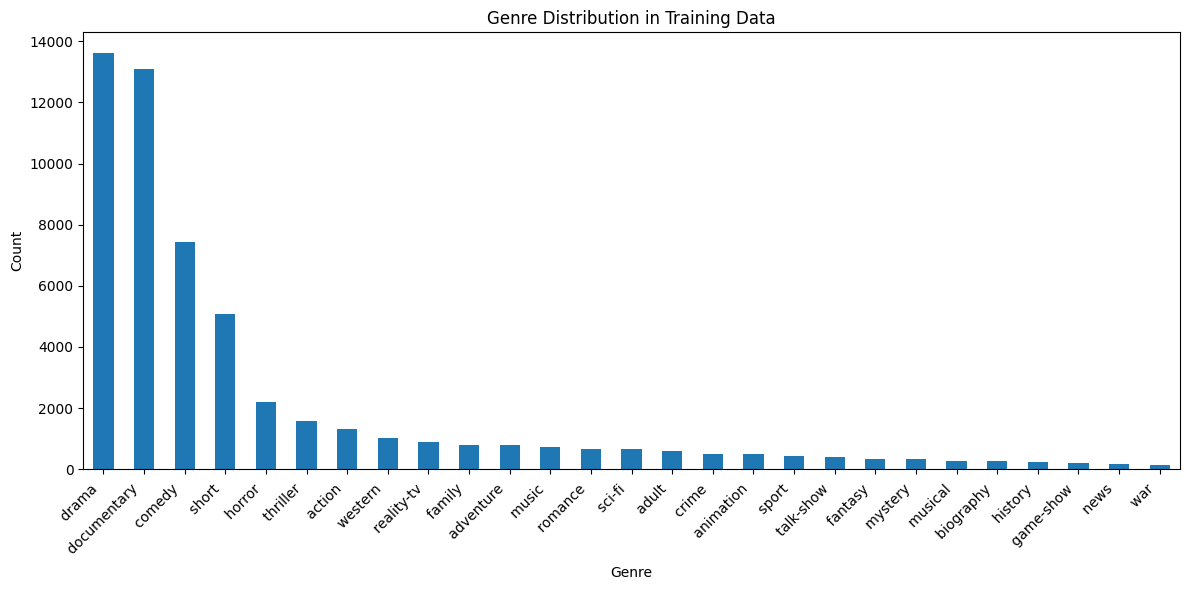


Preprocessing text...

Sample preprocessed text:
                                         Description  \
0   Listening in to a conversation between his do...   
1   A brother and sister with a past incestuous r...   

                                 Cleaned_Description  
0  listening in to a conversation between his doc...  
1  a brother and sister with a past incestuous re...  

Encoding labels...

Number of genres: 27
Genre classes: [' action ' ' adult ' ' adventure ' ' animation ' ' biography ' ' comedy '
 ' crime ' ' documentary ' ' drama ' ' family ' ' fantasy ' ' game-show '
 ' history ' ' horror ' ' music ' ' musical ' ' mystery ' ' news '
 ' reality-tv ' ' romance ' ' sci-fi ' ' short ' ' sport ' ' talk-show '
 ' thriller ' ' war ' ' western ']

Training set size: 43371
Validation set size: 10843

Applying TF-IDF vectorization...
TF-IDF feature shape: (43371, 5000)

Saving processed data...

Preprocessing completed successfully!

Saved artifacts:
- label_encoder.pkl
- vectori

In [ ]:
# Check for missing values
print("\nMissing values:")
print(train_data.isnull().sum())

# Explore genre distribution
print("\nGenre distribution:")
print(train_data['Genre'].value_counts())

# Visualize genre distribution
plt.figure(figsize=(12, 6))
train_data['Genre'].value_counts().plot(kind='bar')
plt.title('Genre Distribution in Training Data')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig('../images/genre_distribution.png', dpi=300, bbox_inches='tight')
plt.show()

# Text preprocessing function
def preprocess_text(text):
    """Clean and preprocess text data"""
    if pd.isna(text):
        return ""
    
    # Convert to lowercase
    text = text.lower()
    
    # Remove special characters and digits
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    
    # Remove extra whitespace
    text = re.sub(r'\s+', ' ', text).strip()
    
    return text

# Apply preprocessing
print("\nPreprocessing text...")
train_data['Cleaned_Description'] = train_data['Description'].apply(preprocess_text)
test_data['Cleaned_Description'] = test_data['Description'].apply(preprocess_text)

# Check preprocessed text
print("\nSample preprocessed text:")
print(train_data[['Description', 'Cleaned_Description']].head(2))

# Encode labels
print("\nEncoding labels...")
label_encoder = LabelEncoder()
train_data['Encoded_Genre'] = label_encoder.fit_transform(train_data['Genre'])

# Save label encoder
with open('../artifacts/label_encoder.pkl', 'wb') as f:
    pickle.dump(label_encoder, f)

print(f"\nNumber of genres: {len(label_encoder.classes_)}")
print(f"Genre classes: {label_encoder.classes_}")

# Split data
X = train_data['Cleaned_Description']
y = train_data['Encoded_Genre']

X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(f"\nTraining set size: {len(X_train)}")
print(f"Validation set size: {len(X_val)}")

# TF-IDF Vectorization
print("\nApplying TF-IDF vectorization...")
vectorizer = TfidfVectorizer(
    max_features=5000,
    ngram_range=(1, 2),
    min_df=2,
    max_df=0.8,
    stop_words='english'
)

X_train_tfidf = vectorizer.fit_transform(X_train)
X_val_tfidf = vectorizer.transform(X_val)

print(f"TF-IDF feature shape: {X_train_tfidf.shape}")

# Save vectorizer
with open('../artifacts/vectorizer.pkl', 'wb') as f:
    pickle.dump(vectorizer, f)

# Save processed data
print("\nSaving processed data...")
np.save('../artifacts/X_train_tfidf.npy', X_train_tfidf.toarray())
np.save('../artifacts/X_val_tfidf.npy', X_val_tfidf.toarray())
np.save('../artifacts/y_train.npy', y_train.values)
np.save('../artifacts/y_val.npy', y_val.values)

# Save test data
test_data.to_csv('../data/test_data_solution.txt', index=False)

print("\nPreprocessing completed successfully!")
print("\nSaved artifacts:")
print("- label_encoder.pkl")
print("- vectorizer.pkl")
print("- Training and validation data")